In [2]:
import IPython, graphviz, re
from io import StringIO
from IPython.display import Image
import numpy as np
import pandas as pd
import math
from sklearn import tree
from sklearn.datasets import load_boston, load_iris
from collections import defaultdict
import string
import re
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# inspired by Mark Needham's blog
# https://markhneedham.com/blog/2017/09/23/python-3-create-sparklines-using-matplotlib/

#def sparkline(data, filename, fill=False, figsize=(4, 0.25), **kwags):
"""
Save a sparkline image
"""

boston = load_boston()

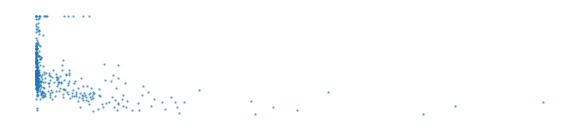

In [20]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

fig, ax = plt.subplots(1, 1, figsize=(10,2))
ax.scatter(data[:,0], target, s=2, alpha=.5)
# ax.scatter(data[:,1], target, s=2)
# ax.scatter(data[:,2], target, s=2)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

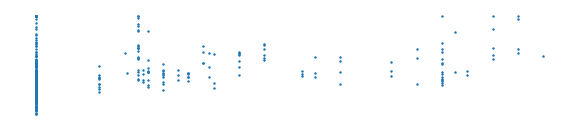

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,2))
ax.scatter(data[:,1], target, s=2)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

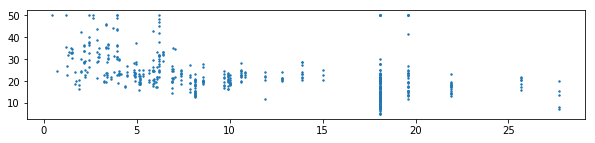

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10,2))
X = data[:,2]
ax.scatter(X, target, s=2)
# for k,v in ax.spines.items():
#     v.set_visible(False)
# ax.set_xticks([])
# ax.set_yticks([])

ax.plot([min(X),])

plt.show()

In [84]:
regr = tree.DecisionTreeRegressor(max_depth=4, random_state=666)
regr.fit(data, target)
feature = regr.tree_.feature  # feature index at splits (-2 means leaf)
threshold = regr.tree_.threshold  # split threshold values at given feature

def get_samples(clf, data):
    """
    Sample indexes falling in each node
    """

    samples = defaultdict(list)
    dec_paths = clf.decision_path(data)

    for d, dec in enumerate(dec_paths):
        for i in range(clf.tree_.node_count):
            if dec.toarray()[0][i]  == 1:
                samples[i].append(d) 
    return samples

id = 0

node_samples = get_samples(regr, data)

node_targets = np.array(node_samples[id])
print(node_targets)
print(feature_names[feature[id]])
split = threshold[id]
print(split)
left = target[node_targets]
right = node_targets[node_targets >= threshold[id]]
print(np.mean(left), np.mean(right))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

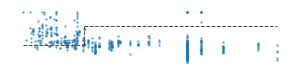

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(5,1))
X = data[:,2]
ax.scatter(X, target, s=2, alpha=.5)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

ax.plot([min(X),split],[np.mean(left),np.mean(left)],'--',color='#444443', linewidth=1)
ax.plot([split,split],[np.mean(left),np.mean(right)],'--',color='#444443', linewidth=1)
ax.plot([split,max(X)],[np.mean(right),np.mean(right)],'--',color='#444443', linewidth=1)

plt.show()

LSTAT
14.399999618530273
26.601829268292683 15.034831460674157


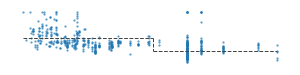

In [70]:
id = 1
print(feature_names[feature[id]])
split = threshold[id]
print(split)
left = target[data[:,feature[id]] < threshold[id]]
right = target[data[:,feature[id]] >= threshold[id]]
print(np.mean(left), np.mean(right))

fig, ax = plt.subplots(1, 1, figsize=(5,1))
X = data[:,2]
ax.scatter(X, target, s=2, alpha=.5)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

ax.plot([min(X),split],[np.mean(left),np.mean(left)],'--',color='#444443', linewidth=1)
ax.plot([split,split],[np.mean(left),np.mean(right)],'--',color='#444443', linewidth=1)
ax.plot([split,max(X)],[np.mean(right),np.mean(right)],'--',color='#444443', linewidth=1)

plt.show()